In [292]:
%matplotlib inline
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.plot as pl
import matplotlib.pyplot as plt

In [275]:
mask = np.zeros((230,180))
mask[70:160, 60:120] = 1
masks = np.array([mask for i in range(13)])

mask2 = np.ones((230,180))
mask2[np.random.randint(230, size=500), np.random.randint(180, size=500)] = 0
masks2 = np.array([mask2 for i in range(8)])
#masks2 = np.random.randint(5, size=(8, 230, 180))

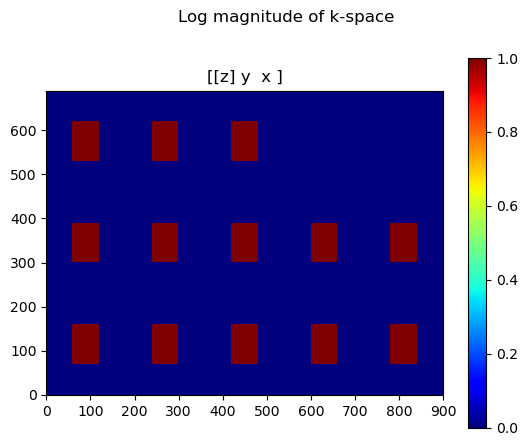

In [298]:
im = pl.ImagePlot(masks, z=0, title='Log magnitude of k-space', colormap="jet")

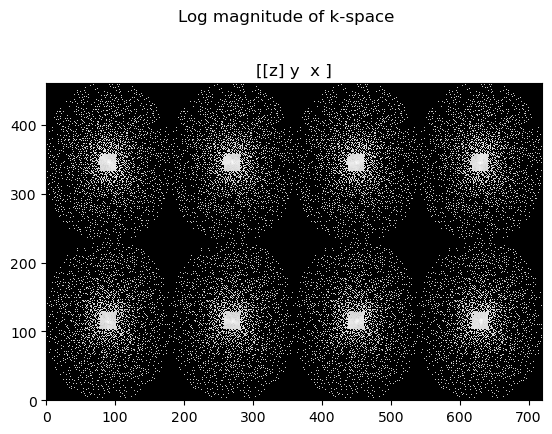

In [239]:
#ksp = np.load('cartesian_ksp.npy')
ksp = np.load('cartesian_ksp.npy')*masks2
pl.ImagePlot(ksp, mode='l', z=0, title='Log magnitude of k-space')

In [240]:
print(ksp.shape)

(8, 230, 180)


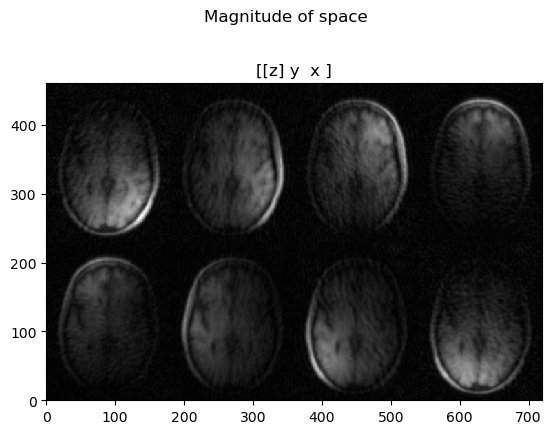

In [241]:
images = sp.ifft(ksp, axes=(-1,-2))
pl.ImagePlot(images, mode='m', z=0, title='Magnitude of space')

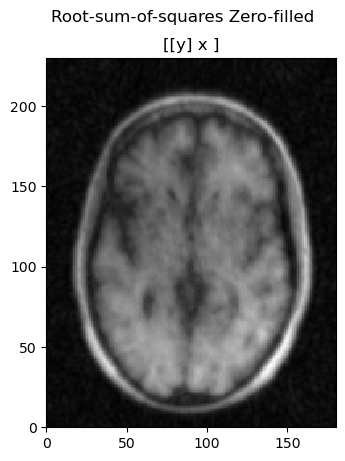

In [242]:
img_rss = np.sum(np.abs(images)**2, axis=0)**0.5

pl.ImagePlot(img_rss, title='Root-sum-of-squares Zero-filled')

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

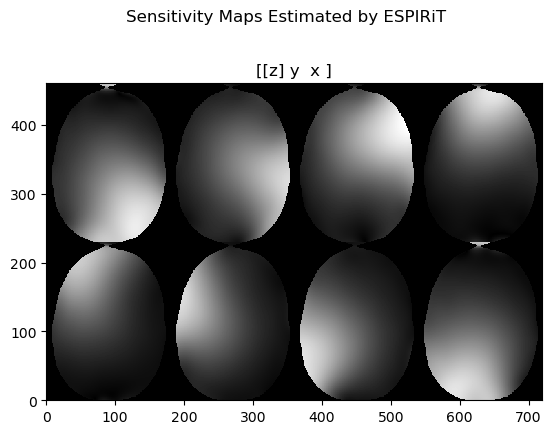

In [243]:
mps = mr.app.EspiritCalib(ksp).run()

pl.ImagePlot(mps, z=0, title='Sensitivity Maps Estimated by ESPIRiT')

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

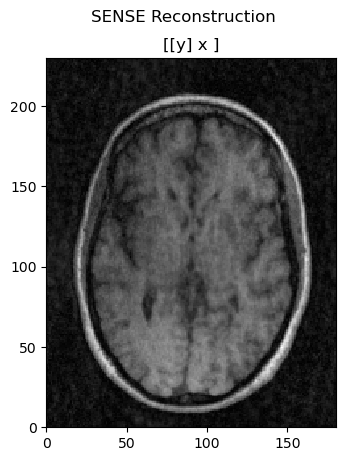

In [206]:
lamda = 0.01
img_sense = mr.app.SenseRecon(ksp, mps, lamda=lamda).run()

pl.ImagePlot(img_sense, title='SENSE Reconstruction')

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

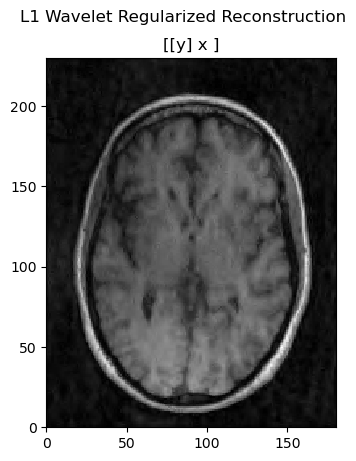

In [207]:
lamda = 0.005
img_l1wav = mr.app.L1WaveletRecon(ksp, mps, lamda).run()

pl.ImagePlot(img_l1wav, title='L1 Wavelet Regularized Reconstruction')

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

TotalVariationRecon:   0%|          | 0/100 [00:00<?, ?it/s]

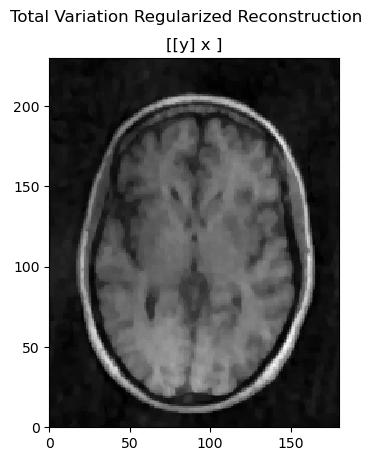

In [208]:
lamda = 0.005
img_tv = mr.app.TotalVariationRecon(ksp, mps, lamda).run()

pl.ImagePlot(img_tv, title='Total Variation Regularized Reconstruction')